# Análisis calidad de datos

## 1. Cargar datos

In [3]:
from functions import *

#url del archivo en github
url = 'https://raw.githubusercontent.com/jorregoc/R5_prueba_tecnica/main/data_raw/taylor_swift_spotify.json'


df = import_json(url) #importar archivo .json
df_final = normalizar_json(df) # procesar archivo

archivo obtenido correctamente


In [94]:
df_final.head()

,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.id,audio_features.time_signature
0,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,-4.840,1,0.0327,0.00942,0.000037,0.3670,0.685,116.998,4WUepByoeqcedHoYhSNHRt,4.0
1,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,-5.376,1,0.0670,5,0,0.1680,0.701,96.057,0108kcWLnn2HlH2kedi1gn,4.0
2,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,-4.785,0,0.0397,0.000421,0.0197,0.0899,0.305,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0
3,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,-5.968,1,0.0447,-0.000537,0.000056,0.3850,0.206,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0
4,06HL4z0CvFAxyc27GX,Taylor Swift,120,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,-5.579,1,0.0317,0.000656,0,0.1310,0.520,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0


In [95]:
df_final.shape

(539, 27)

## 2. Análisis de calidad

### 2.1. Análisis general

**Tipos de datos**

In [54]:
df_final.dtypes

artist_id                           object
artist_name                         object
artist_popularity                    int64
album_id                            object
album_name                          object
album_release_date                  object
album_total_tracks                  object
disc_number                          int64
duration_ms                          int64
explicit                            object
track_number                         int64
track_popularity                     int64
track_id                            object
track_name                          object
audio_features.danceability         object
audio_features.energy              float64
audio_features.key                 float64
audio_features.loudness            float64
audio_features.mode                  int64
audio_features.speechiness         float64
audio_features.acousticness         object
audio_features.instrumentalness     object
audio_features.liveness            float64
audio_featu

Del análisis inicial del tipo de datos, se observa que campos como "***album_total_tracks***", "***danceability***", "***acousticness***", "***instrumentalness***" y "***tempo***" fueron reconocidos por pandas como tipo "object". Sin embargo, estos campos deben ser númericos de acuerdo con la documentación de Spotify. Por tanto, se realizará un análisis particular de estas columnas mas adelante.

**Valores duplicados**

In [96]:
registros_duplicados = df_final[df_final.duplicated(keep=False)] #marcar todos
registros_duplicados_unicos = df_final[df_final.duplicated(keep='first')] #marcar duplicados excepto la primer ocurrencia.
print(f'se encontraron {registros_duplicados.shape[0]} registros duplicados')
print(f'se encontraron {registros_duplicados_unicos.shape[0]} registros unicos duplicados')

se encontraron 36 registros duplicados
se encontraron 18 registros unicos duplicados


In [97]:
registros_duplicados.head()

,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.id,audio_features.time_signature
85,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24,1,234466,True,21,82,3xYJScVfxByb61dYHTwiby,Hits Different,0.672,0.782,5.0,-6.499,1,0.0421,0.148,0.000005,0.2960,0.239,106.026,3xYJScVfxByb61dYHTwiby,4.0
88,06HL4z0CvFAxyc27GX,Taylor Swift,120,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2027-05-26,24,1,234466,True,21,82,3xYJScVfxByb61dYHTwiby,Hits Different,0.672,0.782,5.0,-6.499,1,0.0421,0.148,0.000005,0.2960,0.239,106.026,3xYJScVfxByb61dYHTwiby,4.0
277,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18,1,170640,False,1,77,43rA71bccXFGD4C8GOpIlN,I Forgot That You Existed,0.664,0.316,5.0,-10.345,1,0.5190,0.298,0.000002,0.0812,0.541,92.875,43rA71bccXFGD4C8GOpIlN,4.0
279,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18,1,221306,False,3,92,1dGr1c8CrMLDpV6mPbImSI,Lover,0.359,0.543,7.0,-7.582,1,0.0919,0.492,0.000016,0.1180,0.453,68.534,1dGr1c8CrMLDpV6mPbImSI,4.0
280,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18,1,190360,False,4,86,3RauEVgRgj1IuWdJ9fDs70,The Man,0.777,0.658,0.0,-5.191,1,0.0540,0.0767,0,0.0901,0.633,110.048,3RauEVgRgj1IuWdJ9fDs70,4.0


In [57]:
df_final.loc[df_final['audio_features.id']=='43rA71bccXFGD4C8GOpIlN']

,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.id,audio_features.time_signature
277,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18,1,170640,False,1,77,43rA71bccXFGD4C8GOpIlN,I Forgot That You Existed,0.664,0.316,5.0,-10.345,1,0.519,0.298,0.000002,0.0812,0.541,92.875,43rA71bccXFGD4C8GOpIlN,4.0
295,06HL4z0CvFAxyc27GX,Taylor Swift,120,1NAmidJlEaVgA3MpcPFYGq,Lover,2019-08-23,18,1,170640,False,1,77,43rA71bccXFGD4C8GOpIlN,I Forgot That You Existed,0.664,0.316,5.0,-10.345,1,0.519,0.298,0.000002,0.0812,0.541,92.875,43rA71bccXFGD4C8GOpIlN,4.0


**Valores nulos**

In [110]:
# Obtener el porcentaje de valores nulos o cadenas vacías por columna
total_registros = len(df_final)
columnas_con_nulos_vacios = df_final.isnull().sum() + (df_final == '').sum()
porcentaje_nulos_vacios = (columnas_con_nulos_vacios / total_registros) * 100

# Filtrar solo las columnas con valores nulos o cadenas vacías
columnas_evaluadas = porcentaje_nulos_vacios[porcentaje_nulos_vacios > 0]

# Mostrar el nombre de la columna, la cantidad y porcentaje de valores nulos o cadenas vacías
if not columnas_evaluadas.empty:
    print('Columnas con valores nulos o cadenas vacías - cantidad - porcentaje respecto al total:')
    for columna, porcentaje in columnas_evaluadas.items():
        cantidad = columnas_con_nulos_vacios[columna]
        print(f'{columna}: {cantidad} ({porcentaje:.2f}%)')
else:
    print('No se encontraron columnas con valores nulos o cadenas vacías.')

Columnas con valores nulos o cadenas vacías - cantidad - porcentaje respecto al total:
album_name: 62 (11.50%)
track_id: 8 (1.48%)
track_name: 7 (1.30%)
audio_features.danceability: 2 (0.37%)
audio_features.energy: 2 (0.37%)
audio_features.key: 1 (0.19%)
audio_features.loudness: 2 (0.37%)
audio_features.speechiness: 1 (0.19%)
audio_features.acousticness: 1 (0.19%)
audio_features.liveness: 1 (0.19%)
audio_features.tempo: 1 (0.19%)
audio_features.time_signature: 1 (0.19%)


Existen campos relacionados, por ejemplo track_id con audio_features.id, por lo cual, tener valores nulos puede afectar la integridad referencial.

**Espacios al comienzo y final del registro**

In [111]:
# Verificar espacios iniciales o finales en los registros de columnas de tipo str o object
columnas_con_espacios = []

for columna in df_final.select_dtypes(include=['object', 'string']): # Verifica si la columna es de tipo string u object
    tiene_espacios = df_final[columna].apply(lambda x: isinstance(x, str) and x != x.strip()).any()
    if tiene_espacios:
        columnas_con_espacios.append(columna)

if columnas_con_espacios:
    print("Columnas con registros con espacios iniciales o finales:")
    print(columnas_con_espacios)
else:
    print("No se encontraron registros con espacios iniciales o finales en ninguna columna de tipo str u object.")

No se encontraron registros con espacios iniciales o finales en ninguna columna de tipo str u object.


**Consistencia - formato str**

Se crea una función para evaluar si los campos que reciben strings presentan el mismo formato. Es decir, si el registro está en minúsculas, mayúsculas o mayúscula inicial. Se omiten los campos Id ya que contienen llaves únicas, por lo cual pueden mezclar letras y números.

In [60]:
def verificar_consistencia(df, columnas):
    '''
    Evalúa si todos los valores de una columna presentan el mismo formato en cuanto a
    minúsculas, mayúsculas y mayúsculas iniciales.
    param:: df: Dataframe a evaluar
            columnas: columnas del dataframe a evaluar (lista)
    '''
    columnas_inconsistentes = [] #para almacenar los nombres de las columnas que no cumplen con la condición dada.
    
    for columna in columnas:
        valores = df[columna]
        
        # Verificar si todos los valores están en minúsculas, mayúsculas o en mayúscula inicial
        if valores.str.islower().all() or valores.str.isupper().all() or valores.str.istitle().all():
            continue  # Todos los valores tienen la misma consistencia en esta columna
        
        columnas_inconsistentes.append(columna)
    
    return columnas_inconsistentes


# Lista de columnas a evaluar
columnas_evaluar = ['track_name','album_name']

# Verificar consistencia en las columnas seleccionadas
columnas_inconsistentes = verificar_consistencia(df_final, columnas_evaluar)

if columnas_inconsistentes:
    print("Las siguientes columnas no tienen consistencia de formato:")
    print(columnas_inconsistentes)
else:
    print("Todas las columnas tienen consistencia de formato.")

Las siguientes columnas no tienen consistencia de formato:
['track_name', 'album_name']


In [61]:
#uso de minusculas y masyusculas en album_name
df_final['album_name'].unique()

array(["1989 (Taylor's Version) [Deluxe]", "1989 (Taylor's Version)",
       "Speak Now (Taylor's Version)", 'Midnights (The Til Dawn Edition)',
       'Midnights (3am Edition)', 'Midnights', "Red (Taylor's Version)",
       "Fearless (Taylor's Version)", 'evermore (deluxe version)',
       'evermore',
       'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
       'folklore (deluxe version)', 'folklore', 'Lover', 'reputation',
       None, '1989 (Deluxe)', '1989', 'Red (Deluxe Edition)', '',
       'Speak Now', 'Speak Now (Deluxe Package)',
       'Fearless (Platinum Edition)', 'Fearless (International Version)',
       'Live From Clear Channel Stripped 2008', 'Taylor Swift'],
      dtype=object)

In [62]:
#uso de minusculas y masyusculas en track_name
df_final['track_name'].unique()

array(["Welcome To New York (Taylor's Version)",
       "Blank Space (Taylor's Version)", "Style (Taylor's Version)",
       "Out Of The Woods (Taylor's Version)",
       "All You Had To Do Was Stay (Taylor's Version)",
       "Shake It Off (Taylor's Version)",
       "I Wish You Would (Taylor's Version)",
       "Bad Blood (Taylor's Version)",
       "Wildest Dreams (Taylor's Version)",
       "How You Get The Girl (Taylor's Version)",
       'This Love (Taylor’s Version)', "I Know Places (Taylor's Version)",
       "Clean (Taylor's Version)", "Wonderland (Taylor's Version)",
       "You Are In Love (Taylor's Version)",
       "New Romantics (Taylor's Version)",
       '"Slut!" (Taylor\'s Version) (From The Vault)',
       "Say Don't Go (Taylor's Version) (From The Vault)",
       "Now That We Don't Talk (Taylor's Version) (From The Vault)",
       "Suburban Legends (Taylor's Version) (From The Vault)",
       "Is It Over Now? (Taylor's Version) (From The Vault)",
       "Bad Blood (f

**Consistencia - formato float**

Se crea otra función para evaluar la consistencia en los campos tipo float

In [113]:
def verificar_consistencia_decimales(df, columnas):
    '''
     Evalúa si todas los registros en las columnas indicadas
     contienen la misma cantidad de decimales.
     param:: df: Dataframe a evaluar
             columnas: columnas del dataframe a evaluar (lista)
    '''
    columnas_inconsistentes = []

    for columna in columnas:
        valores = df[columna]

        # Convertir los valores a cadenas y obtener la cantidad de decimales en cada valor
        decimales = valores.apply(lambda x: len(str(x).split('.')[-1]) if isinstance(x, float) else 0)
        
        # Verificar si todos los registros tienen la misma cantidad de decimales
        if decimales.nunique() > 1:
            columnas_inconsistentes.append(columna)

    return columnas_inconsistentes

# Lista de columnas a evaluar
columnas_evaluar = ['audio_features.danceability','audio_features.energy','audio_features.speechiness',
                    'audio_features.instrumentalness','audio_features.liveness','audio_features.valence',
                   'audio_features.tempo']

# Verificar consistencia en las columnas seleccionadas
columnas_inconsistentes = verificar_consistencia_decimales(df_final, columnas_evaluar)

if columnas_inconsistentes:
    print("Las siguientes columnas no tienen consistencia en la cantidad de decimales:")
    print(columnas_inconsistentes)
else:
    print("Todas las columnas tienen consistencia en la cantidad de decimales.")

Las siguientes columnas no tienen consistencia en la cantidad de decimales:
['audio_features.danceability', 'audio_features.energy', 'audio_features.speechiness', 'audio_features.instrumentalness', 'audio_features.liveness', 'audio_features.valence', 'audio_features.tempo']


**Campos tipo fecha**

En primer lugar, se evalúa que no existan registros con fecha superior a la actual, puesto que no concuerda que un albúm se haya estrenado en el futuro.

In [64]:
from datetime import datetime

df_final['album_release_date'] = pd.to_datetime(df_final['album_release_date'])

# Obtener la fecha actual
fecha_actual = datetime.now()

# Filtrar filas donde 'album_release_date' sea superior a la fecha actual
fechas_superiores = df_final[df_final['album_release_date'] > fecha_actual]

# Comprobar si hay filas donde la fecha de lanzamiento sea superior a la fecha actual
if fechas_superiores.empty:
    print("No hay valores en la columna 'album_release_date' que sean superiores a la fecha actual.")
else:
    print("Los siguientes albumes en la columna 'album_release_date' son superiores a la fecha actual:")
    print(fechas_superiores.album_id.unique())

Los siguientes albumes en la columna 'album_release_date' son superiores a la fecha actual:
['1fnJ7k0bllNfL1kVdNVW1A']


In [65]:
df_final.loc[df_final['album_id'] == '1fnJ7k0bllNfL1kVdNVW1A'][['album_id','album_release_date']].head()

,album_id,album_release_date
65,1fnJ7k0bllNfL1kVdNVW1A,2027-05-26
66,1fnJ7k0bllNfL1kVdNVW1A,2027-05-26
67,1fnJ7k0bllNfL1kVdNVW1A,2027-05-26
68,1fnJ7k0bllNfL1kVdNVW1A,2027-05-26
69,1fnJ7k0bllNfL1kVdNVW1A,2027-05-26


In [66]:
df_final.album_release_date.unique()

array(['2023-10-27T00:00:00.000000000', '2023-10-26T00:00:00.000000000',
       '2023-07-07T00:00:00.000000000', '2027-05-26T00:00:00.000000000',
       '2022-10-22T00:00:00.000000000', '2022-10-21T00:00:00.000000000',
       '2021-11-12T00:00:00.000000000', '2021-04-09T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2020-12-11T00:00:00.000000000',
       '2020-11-25T00:00:00.000000000', '2020-08-18T00:00:00.000000000',
       '2020-07-24T00:00:00.000000000', '2019-08-23T00:00:00.000000000',
       '2017-11-10T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2012-10-22T00:00:00.000000000',
       '2010-10-25T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2008-11-11T00:00:00.000000000', '2008-06-28T00:00:00.000000000',
       '1989-10-24T00:00:00.000000000'], dtype='datetime64[ns]')

Adicionalmente, se observa que un álbum se estrenó el 24 de octubre de 1989, lo cual no concuerda con la fecha de nacimiento de la cantante (13-12-1989)

### 2.2. Revisión outliers

Dado que es necesario realizar algunas conversiones en los datos (solo para finalidad del análisis y no del dataframe final), se usará una copia del dataframe.

In [67]:
df_outliers = df_final.copy()

In [68]:
#se eliminan valores nulos y cadenas vacías para efectos del análisis
df_outliers.dropna(inplace=True)
df_outliers.replace('',0, inplace=True)
df_outliers['album_total_tracks'] = df_outliers['album_total_tracks'].replace('Thirteen',13)

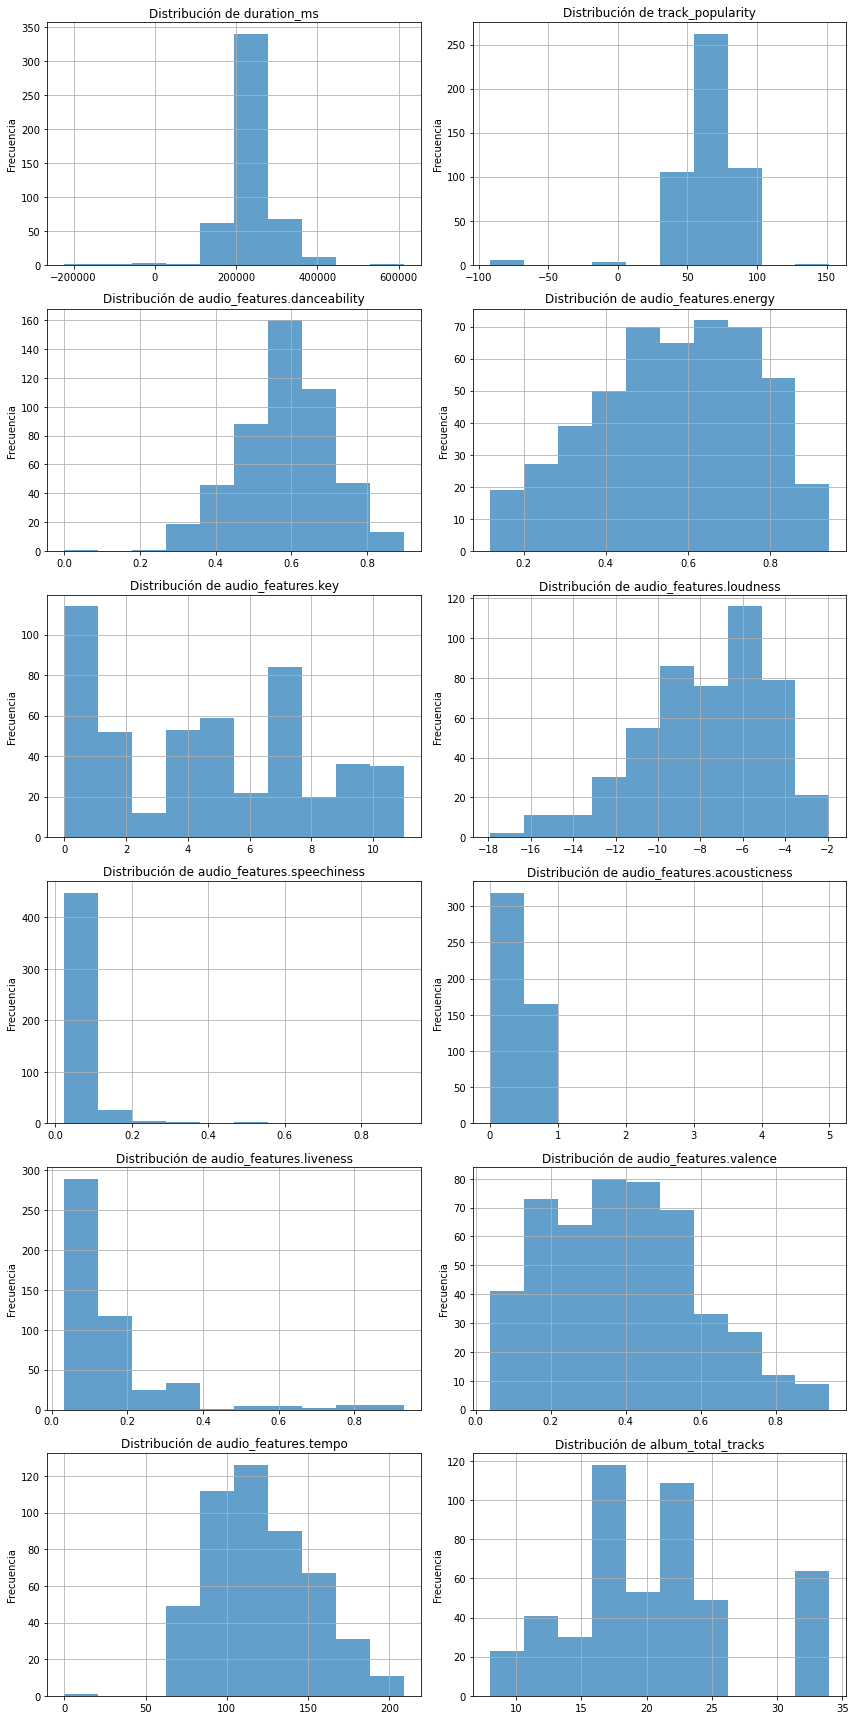

In [69]:
import matplotlib.pyplot as plt

# Lista de columnas a graficar
columnas_graficar = ['duration_ms', 'track_popularity', 'audio_features.danceability','audio_features.energy',
                    'audio_features.key','audio_features.loudness','audio_features.speechiness',
                     'audio_features.acousticness','audio_features.liveness',
                    'audio_features.valence','audio_features.tempo','album_total_tracks']

num_filas = len(columnas_graficar) // 2 + len(columnas_graficar) % 2

fig, axs = plt.subplots(num_filas, 2, figsize=(12, num_filas * 4))

for i, columna in enumerate(columnas_graficar):
    row = i // 2
    col = i % 2
    axs[row, col].hist(df_outliers[columna], bins=10, alpha=0.7)
    axs[row, col].set_title(f'Distribución de {columna}')
    #axs[row, col].set_xlabel('Valores')
    axs[row, col].set_ylabel('Frecuencia')
    axs[row, col].grid(True)

# Si hay un número impar de columnas, eliminar la última subgráfica vacía
if len(columnas_graficar) % 2 != 0:
    fig.delaxes(axs[num_filas - 1, 1])

plt.tight_layout()
plt.show()

### 2.3. Análisis específico

**Campo explicit**: Según la documentación de spotify, este campo acepta los valores "True" y "False". Sin embargo, se observan registros traducidos (No y Si).

In [70]:
#campo explicit: es un booleano pero acepta 4 valores: False, True, No y Si
df_final['explicit'].value_counts()

False    480
True      54
No         4
Si         1
Name: explicit, dtype: int64

**Campo duration_ms**

En primer lugar, se revisa que no existan valores negativos:

In [71]:
#campo duration_ms tiene valores negativos
df_final.loc[df_final['duration_ms'] <0][['album_id','duration_ms']]

,album_id,duration_ms
392,1yGbNOtRIgdIiGHOEBaZWf,-107133
408,1KVKqWeRuXsJDLTW0VuD29,-223093


Adicionalmente se analizan valores extremos (duraciones muy cortas o muy largas comparadas con la media)

<AxesSubplot:>

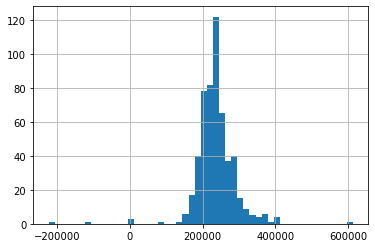

In [72]:
df_final['duration_ms'].hist(bins=50)

In [73]:
df_final[df_final['duration_ms'] < 10000]

,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.id,audio_features.time_signature
392,06HL4z0CvFAxyc27GX,Taylor Swift,120,1yGbNOtRIgdIiGHOEBaZWf,1989 (Deluxe),2014-01-01,19,1,-107133,False,18,0,4eTXfpHxhxVofrBUjAhPMg,I Wish You Would - Voice Memo,0.781,0.357,0.0,-16.394,1,0.9120,0.717,0,0.1850,0.645,118.317,4eTXfpHxhxVofrBUjAhPMg,4.0
408,06HL4z0CvFAxyc27GX,Taylor Swift,120,1KVKqWeRuXsJDLTW0VuD29,Red (Deluxe Edition),2012-10-22,22,1,-223093,False,2,59,7gJtmLyPTwKzhGzMBXtuXH,,0.602,0.896,1.0,-4.267,0,0.0437,0.0773,0.000089,0.0911,0.641,124.978,7gJtmLyPTwKzhGzMBXtuXH,4.0
420,06HL4z0CvFAxyc27GX,Taylor Swift,120,1KVKqWeRuXsJDLTW0VuD29,Red (Deluxe Edition),2012-10-22,22,1,10,False,14,56,5PjfMmF06QtxTPZBZHdhoZ,Everything Has Changed,0.624,0.458,6.0,-6.755,1,0.0287,0.36,0.000004,0.3110,0.436,80.016,5PjfMmF06QtxTPZBZHdhoZ,4.0
432,06HL4z0CvFAxyc27GX,Taylor Swift,120,6fyR4wBPwLHKcRtxgd4sGh,,2010-10-25,16,1,1000,False,4,47,7mFiEij8AXPUZB7aKLbUlQ,Mean - Live/2011,0.429,0.915,4.0,-4.373,1,0.0690,0.154,0,0.6930,0.432,,7mFiEij8AXPUZB7aKLbUlQ,4.0
472,06HL4z0CvFAxyc27GX,Taylor Swift,120,6S6JQWzUrJVcJLK4fi74Fw,Speak Now (Deluxe Package),2010-01-01,22,1,3000,False,14,152,7BFc7ffruhZ4Hecnqf5xju,Long Live,0.412,0.682,7.0,-4.319,1,0.0339,0.0426,0.000075,0.1060,0.146,203.959,7BFc7ffruhZ4Hecnqf5xju,4.0


In [74]:
df_final[df_final['duration_ms'] > 500000]

,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.id,audio_features.time_signature
151,06HL4z0CvFAxyc27GX,Taylor Swift,120,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,34,1,613026,True,30,87,5enxwA8aAbwZbf5qCHORXi,All Too Well (10 Minute Version) (Taylor's Ver...,0.631,0.518,0.0,-8.771,1,0.0303,0.274,0,0.088,0.205,93.023,5enxwA8aAbwZbf5qCHORXi,4.0


En este caso, se trata de una versión de 10 minutos (600.000 ms) por lo cual tiene sentido el valor alto.

**Campo track_popularity**

<AxesSubplot:>

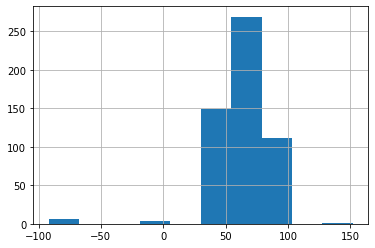

In [75]:
df_final['track_popularity'].hist()

In [76]:
#Según la documentación de spotify, el valor debe estar entre 0 y 100, siendo 100 el mas popular
df_final.loc[(df_final['track_popularity'] <0) | (df_final['track_popularity'] > 100)][['album_id','track_popularity']]

,album_id,track_popularity
75,1fnJ7k0bllNfL1kVdNVW1A,-69
89,3lS1y25WAhcqJDATJK70Mq,-70
109,151w1FgRZfnKZA9FEcg9Z3,-85
111,151w1FgRZfnKZA9FEcg9Z3,-92
115,151w1FgRZfnKZA9FEcg9Z3,-75
128,6kZ42qRrzov54LcAk4onW9,-71
472,6S6JQWzUrJVcJLK4fi74Fw,152


**Campo audio_features.mode**

In [77]:
#sin comentarios. Cumple con la descripción de la documentación
df_final['audio_features.mode'].unique()

array([1, 0], dtype=int64)

**Campo audio_features.acousticness**

In [78]:
df_final['audio_features.acousticness'].unique()

array([0.00942, 5, 0.000421, -0.000537, 0.000656, 0.0121, -0.00354,
       0.0362, 0.0436, 0.00196, 0.316, 0.0999, 0.25, 0.00976, 0.61,
       0.00675, 0.309, 0.066, 0.16, 0.207, 0.041, 0.0104, 0.00961, 0.0976,
       0.000418, 0.000512, 0.000718, 0.0103, 0.00357, 0.0385, 0.0411,
       0.00209, 0.299, 0.087, 0.276, 0.00933, 0.609, 0.0068, 0.345,
       0.0656, 0.186, 0.198, 0.0504, 0.00444, 0.0251, 0.00621, 0.248,
       0.0236, 0.311, 0.00192, 0.851, 0.012, 0.000886, 0.101, 0.00667,
       0.447, 0.0122, 0.449, 0.0031, 0.0164, 0.159, 0.0586, 0.362, 0.617,
       0.3, 0.236, 0.0609, 0.115, 0.705, 0.423, 0.205, 0.157, 0.0648,
       0.804, 0.0782, 0.967, 0.545, 0.203, 0.837, 0.116, 0.726, 0.318,
       0.435, 0.497, 0.148, 0.806, 0.0623, 0.204, 0.0593, 0.133, 0.735,
       0.416, 0.71, 0.226, 0.0661, 0.791, 0.074, 0.571, 0.219, 0.826,
       0.112, 0.723, 0.361, 0.43, 0.481, 0.258, 0.0573, 0.13, 0.69, 0.401,
       0.2, 0.173, 0.0618, 0.785, 0.0734, 0.964, 0.553, 0.000328, 0.00108,
   

Este es uno de los campos que se identificaron inicialmente como tipo "object". Al analizar los valores únicos se observa que existen valores negativos, cadenas vacías y no hay consistencia en el número de decimales como se revisó previamente. 

Adicionalmente, hay valores superiores a uno, lo cual no debe pasar acorde con la documentación de spotify (valores deben estar entre 0 y 1)

**Campo audio_features.instrumentalness**

Adicional al análisis de consistencia, se observa que algunos valores están almacenados con formato de notación científica, e incluso como cadenas de texto ('7.28x-06').

In [79]:
#algunos valores almacenados en notación científica, otros en formato decimal y otros en formato texto
df_final['audio_features.instrumentalness'].unique()

array([3.66e-05, 0, 0.0197, 5.59e-05, 2.18e-05, 1.25e-05, 7.18e-05,
       1.09e-05, 2.92e-05, 2.61e-05, 3.91e-06, 4.63e-06, 0.000199,
       9.94e-06, 7.14e-05, 2.24e-05, 0.0214, 9.37e-05, 1.27e-05, 1.04e-05,
       9.35e-05, 9.88e-06, 2.01e-05, 1.88e-05, 2.49e-06, 9.81e-06,
       7.62e-05, 1.67e-05, 3.81e-05, 1.38e-06, 4.43e-06, 0.00113, 1.4e-06,
       1.22e-06, 0.0013, 1.05e-05, 6.78e-05, 3.42e-05, 0.000128, 0.328,
       0.00012, 0.000915, 2.78e-05, 0.00269, 3.07e-05, 0.00147, 0.00104,
       4.73e-06, 3.5e-06, 0.0012, 1.23e-06, 0.00321, 8.47e-06, 6.51e-05,
       1.74e-05, 0.000102, 0.348, 4.71e-05, 2.23e-05, 0.00648, 3.27e-05,
       0.000575, 0.00145, 0.000573, 1.03e-06, 1.8e-06, 0.000993, 5.2e-06,
       5.17e-05, 5.25e-05, 5.58e-05, 0.488, 7.72e-05, 0.00129, 1.62e-06,
       0.000127, 0.00203, 1.02e-05, 1.86e-06, 0.00218, 9.19e-05, 1.57e-06,
       2.83e-06, 3.72e-06, 3.97e-06, 1.2e-05, 0.00179, 0.166, 6.59e-05,
       2.67e-05, 0.000904, 1.97e-05, 0.000155, 0.179, 0.000136,

**Campo album_id**

validar que cada album_id solo corresponda a un único valor en album_name

In [80]:
# Verificar que cada album_id corresponda a un único album_name
validation_result = df_final.groupby('album_id')['album_name'].nunique() == 1

# Mostrar los album_id que no cumplen con la validación
invalid_ids = validation_result[validation_result == False].index.tolist()
if len(invalid_ids) > 0:
    print("Los siguientes album_id no corresponden a un único album_name:")
    print(invalid_ids)
else:
    print("Todos los album_id corresponden a un único album_name.")

Los siguientes album_id no corresponden a un único album_name:
['1MPAXuTVL2Ej5x0JHiSPq8']


Al realizar un análisis más amplio, se identifica que el motivo de que estos registros no correspondan a un único album_name es por la presencia de los valores nulos que detectamos incialmente.

In [81]:
album_rep = df_final.loc[df_final['album_id']=='1MPAXuTVL2Ej5x0JHiSPq8'][['album_name']].reset_index()
album_rep['album_name'].unique()

array([None], dtype=object)

**Campo album_total_tracks**

In [82]:
df_final['album_total_tracks'].unique()

array([22, 21, 24, 20, 13, 34, 26, 17, 10, 16, 18, 15, 46, 19, 14, 8,
       'Thirteen'], dtype=object)

hay tracks que estan escritas con letras y no con numeros

In [83]:
#análisis de la distribución de los datos
df_outliers.loc[df_outliers['album_total_tracks'] >30]

,artist_id,artist_name,artist_popularity,album_id,album_name,album_release_date,album_total_tracks,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.id,audio_features.time_signature
122,06HL4z0CvFAxyc27GX,Taylor Swift,120,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,34,1,295413,False,1,72,6lzc0Al0zfZOIFsFvBS1ki,State Of Grace (Taylor's Version),0.594,0.713,9.0,-5.314,1,0.0503,0.000328,0,0.1140,0.328,129.958,6lzc0Al0zfZOIFsFvBS1ki,4.0
123,06HL4z0CvFAxyc27GX,Taylor Swift,120,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,34,1,223093,False,2,80,4OAuvHryIVv4kMDNSLuPt6,Red (Taylor's Version),0.516,0.777,1.0,-4.908,0,0.0375,0.001080,0.000002,0.0761,0.408,125.047,4OAuvHryIVv4kMDNSLuPt6,4.0
124,06HL4z0CvFAxyc27GX,Taylor Swift,120,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,34,1,242720,False,3,72,3S7HNKPakdwNEBFIVTL6dZ,Treacherous (Taylor's Version),0.645,0.593,2.0,-6.506,1,0.0288,0.034400,0.000127,0.1300,0.299,109.984,3S7HNKPakdwNEBFIVTL6dZ,4.0
125,06HL4z0CvFAxyc27GX,Taylor Swift,120,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,34,1,219760,False,4,80,6AtZLIzUINvExIUy4QhdjP,I Knew You Were Trouble (Taylor's Version),0.584,0.557,6.0,-6.371,1,0.0342,0.012900,0,0.0576,0.767,154.008,6AtZLIzUINvExIUy4QhdjP,4.0
126,06HL4z0CvFAxyc27GX,Taylor Swift,120,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,34,1,329160,False,5,78,3nsfB1vus2qaloUdcBZvDu,All Too Well (Taylor's Version),0.440,0.528,0.0,-7.809,1,0.0317,0.017100,0.00203,0.2340,0.132,185.972,3nsfB1vus2qaloUdcBZvDu,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,06HL4z0CvFAxyc27GX,Taylor Swift,120,0PZ7lAru5FDFHuirTkWe9Z,folklore: the long pond studio sessions (from ...,2020-11-25,34,2,274880,False,13,56,4yyKppX85ZkmlGOC2toBZA,epiphany - the long pond studio sessions,0.524,0.200,1.0,-13.004,1,0.0274,0.916000,0.000392,0.0680,0.113,93.870,4yyKppX85ZkmlGOC2toBZA,4.0
240,06HL4z0CvFAxyc27GX,Taylor Swift,120,0PZ7lAru5FDFHuirTkWe9Z,folklore: the long pond studio sessions (from ...,2020-11-25,34,2,290040,True,14,58,1mh5dObNoOvCfHmXnhvDEK,betty - the long pond studio sessions,0.538,0.316,9.0,-9.500,0,0.0299,0.841000,0,0.1190,0.518,95.680,1mh5dObNoOvCfHmXnhvDEK,4.0
241,06HL4z0CvFAxyc27GX,Taylor Swift,120,0PZ7lAru5FDFHuirTkWe9Z,folklore: the long pond studio sessions (from ...,2020-11-25,34,2,214373,True,15,57,4YHHz3VIXgNDGdoL9xC1tx,peace - the long pond studio sessions,0.619,0.344,5.0,-11.472,1,0.0647,0.930000,0.000076,0.0734,0.513,149.897,4YHHz3VIXgNDGdoL9xC1tx,4.0
242,06HL4z0CvFAxyc27GX,Taylor Swift,120,0PZ7lAru5FDFHuirTkWe9Z,folklore: the long pond studio sessions (from ...,2020-11-25,34,2,221800,False,16,58,0QTBsdoJhamY3Aid3fOsOd,hoax - the long pond studio sessions,0.682,0.155,8.0,-13.083,1,0.0394,0.962000,0,0.1800,0.483,118.832,0QTBsdoJhamY3Aid3fOsOd,4.0


In [84]:
#validar cuántas canciones tiene el album Red (Taylor's Version)
df_red = df_outliers.loc[df_outliers['album_name'] =="Red (Taylor's Version)"]
df_red.shape

(30, 27)

In [85]:
#validar cuántas canciones tiene el album folklore
df_folk = df_outliers.loc[df_outliers['album_name'] =="folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]"]
df_folk.shape

(34, 27)

Se observa que si existen álbumes con más de 30 canciones, sin ser un error de los datos. Sin embargo, se identificó que para el álbum "Red (Taylor's Version)" la cantidad de registros (canciones) no coincide con los reportados en el campo "album_total_tracks". Por tanto, se realiza el análisis para el dataframe entero.

In [86]:
# Obtener el recuento de canciones por "album_name"
count_per_album = df_final.groupby('album_name')['album_id'].count()

# Comparar el recuento de canciones con "album_total_tracks"
albums_with_mismatch = count_per_album[count_per_album.ne(df_final.groupby('album_name')['album_total_tracks'].first())]

# Imprimir los "album_name" con discrepancias
if not albums_with_mismatch.empty:
    print("Los siguientes álbumes tienen discrepancias entre el recuento de canciones y el reportado en 'album_total_tracks':\n")
    for album in albums_with_mismatch.index:
        total_tracks = df_final.loc[df_final['album_name'] == album, 'album_total_tracks'].iloc[0]
        print(f"{album}, album_total_tracks: {total_tracks}, Recuento de canciones: {count_per_album[album]}")
else:
    print("Todos los álbumes coinciden respecto al recuento de canciones y lo reportado en 'album_total_tracks'.")

Los siguientes álbumes tienen discrepancias entre el recuento de canciones y el reportado en 'album_total_tracks':

Lover, album_total_tracks: 18, Recuento de canciones: 36
Red (Taylor's Version), album_total_tracks: 34, Recuento de canciones: 30
Taylor Swift, album_total_tracks: Thirteen, Recuento de canciones: 15
evermore, album_total_tracks: 10, Recuento de canciones: 15
reputation, album_total_tracks: 15, Recuento de canciones: 16


Teniendo en cuenta que anteriormente se encontraron valores repetidos, se realizará de nuevo el análisis pero excluyendo estos valores, de manera que nos acerquemos a un valor más real.

In [90]:
df_sin_repetidos = df_final.drop_duplicates(keep='first')

In [91]:
df_sin_repetidos.shape

(521, 27)

In [92]:
# Obtener el recuento de canciones por "album_name"
count_per_album = df_sin_repetidos.groupby('album_name')['album_id'].count()

# Comparar el recuento de canciones con "album_total_tracks"
albums_with_mismatch = count_per_album[count_per_album.ne(df_sin_repetidos.groupby('album_name')['album_total_tracks'].first())]

# Imprimir los "album_name" con discrepancias
if not albums_with_mismatch.empty:
    print("Los siguientes álbumes tienen discrepancias entre el recuento de canciones y el reportado en 'album_total_tracks':\n")
    for album in albums_with_mismatch.index:
        total_tracks = df_sin_repetidos.loc[df_sin_repetidos['album_name'] == album, 'album_total_tracks'].iloc[0]
        print(f"{album}, album_total_tracks: {total_tracks}, Recuento de canciones: {count_per_album[album]}")
else:
    print("Todos los álbumes coinciden respecto al recuento de canciones y lo reportado en 'album_total_tracks'.")

Los siguientes álbumes tienen discrepancias entre el recuento de canciones y el reportado en 'album_total_tracks':

Lover, album_total_tracks: 18, Recuento de canciones: 19
Midnights (The Til Dawn Edition), album_total_tracks: 24, Recuento de canciones: 23
Red (Taylor's Version), album_total_tracks: 34, Recuento de canciones: 30
Taylor Swift, album_total_tracks: Thirteen, Recuento de canciones: 15
evermore, album_total_tracks: 10, Recuento de canciones: 15
reputation, album_total_tracks: 15, Recuento de canciones: 16
